# Importing all the required libraries

#### Our main idea in this notebook is to predict whether employee is going to leave the company based on the features 'satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years', 'sales', 'salary'... The output y = 'left' which is a binary input ultimately 0 or 1.



In [1]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
df = df.rename(columns={'sales': 'department'})

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


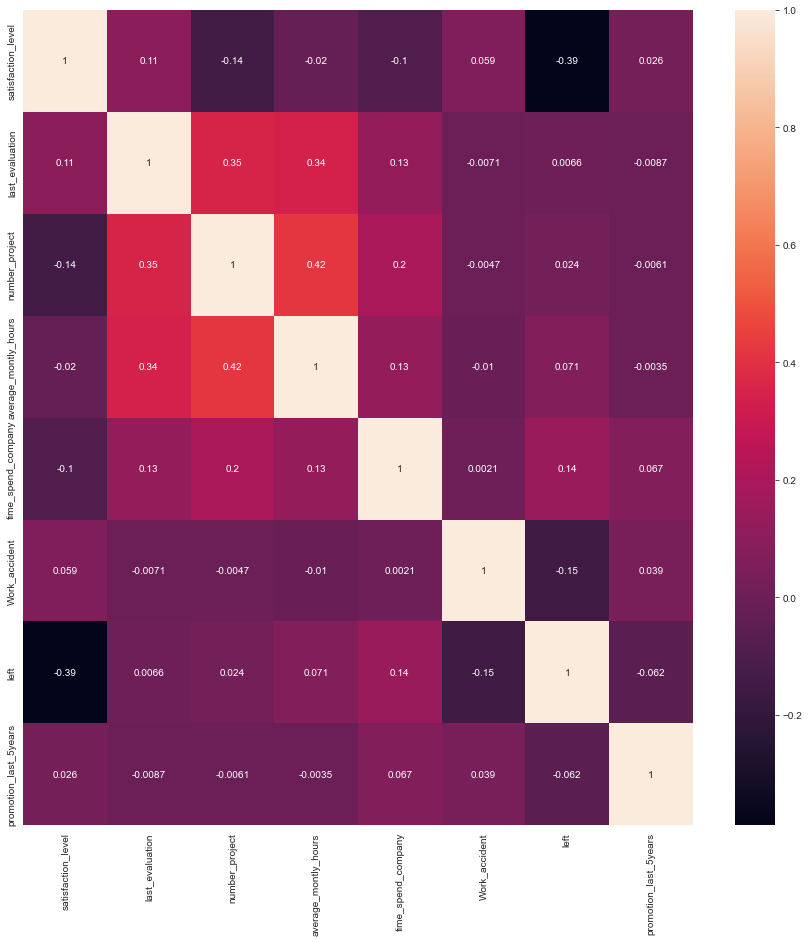

In [8]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True);

In [9]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
df['department'] = np.where(df.department == 'support', 'technical',df['department'])
df['department'] = np.where(df.department == 'IT', 'technical', df['department'])

In [11]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [12]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df['department']

0            sales
1            sales
2            sales
3            sales
4            sales
           ...    
14994    technical
14995    technical
14996    technical
14997    technical
14998    technical
Name: department, Length: 14999, dtype: object

In [15]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [16]:
dummy = pd.Series(df.department)
print(pd.get_dummies(dummy))

       RandD  accounting  hr  management  marketing  product_mng  sales  \
0          0           0   0           0          0            0      1   
1          0           0   0           0          0            0      1   
2          0           0   0           0          0            0      1   
3          0           0   0           0          0            0      1   
4          0           0   0           0          0            0      1   
...      ...         ...  ..         ...        ...          ...    ...   
14994      0           0   0           0          0            0      0   
14995      0           0   0           0          0            0      0   
14996      0           0   0           0          0            0      0   
14997      0           0   0           0          0            0      0   
14998      0           0   0           0          0            0      0   

       technical  
0              0  
1              0  
2              0  
3              0  
4   

### Like shown in the above cell, we are going to get all the values under depertment and salary columns into features to gain more accuracy. For this step, we are using get_dummies from pandas.

In [17]:
columns_variables=['department','salary']
for var in columns_variables:
    tables_list = pd.get_dummies(df[var], prefix=var)
    print(tables_list)
    df1=df.join(tables_list)
    df=df1

       department_RandD  department_accounting  department_hr  \
0                     0                      0              0   
1                     0                      0              0   
2                     0                      0              0   
3                     0                      0              0   
4                     0                      0              0   
...                 ...                    ...            ...   
14994                 0                      0              0   
14995                 0                      0              0   
14996                 0                      0              0   
14997                 0                      0              0   
14998                 0                      0              0   

       department_management  department_marketing  department_product_mng  \
0                          0                     0                       0   
1                          0                     0             

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0


In [19]:
df.drop(['department', 'salary'], inplace=True, axis=1)

In [20]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


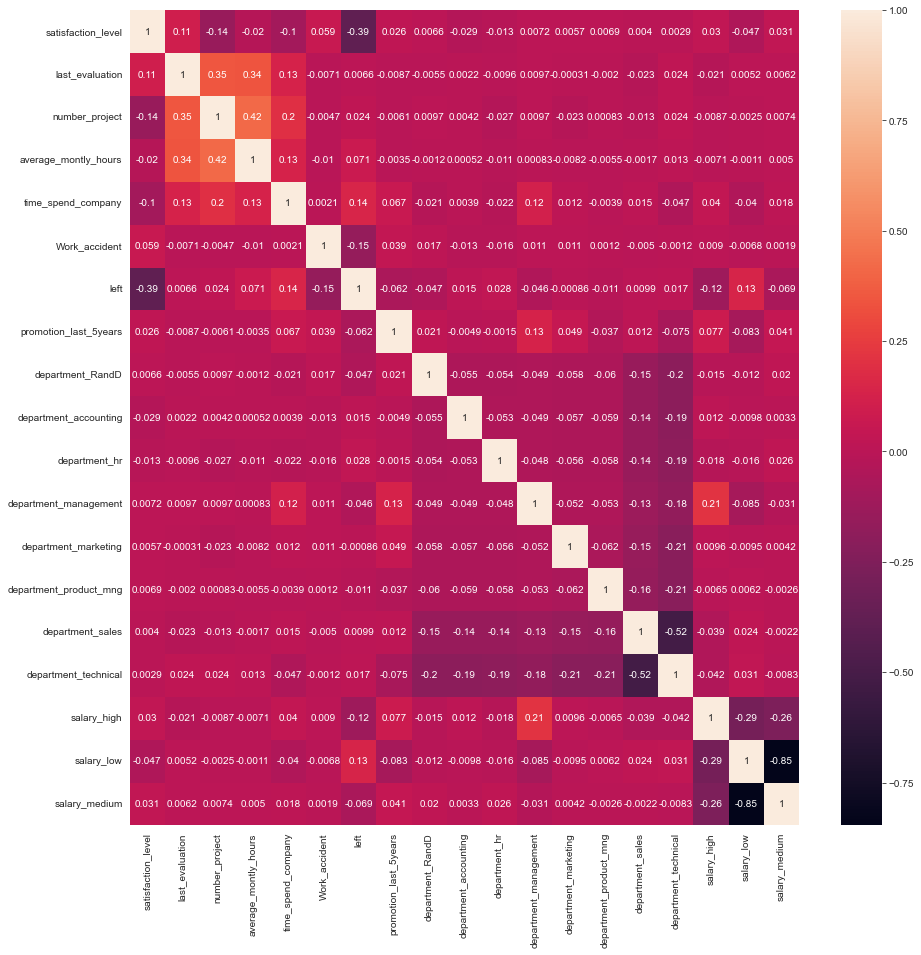

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True);

In [22]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [23]:

used_columns=[]

for x in df.columns:
    if x!='left':
        used_columns.append(x)
        
y = ['left']
X = df[used_columns]
y = df[y]

np.where(y==0)

(array([ 2000,  2001,  2002, ..., 14208, 14209, 14210], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [24]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [25]:
## scaling all the values so that all the input varialbes will be in same standard.
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.29980859,
        -0.97582386,  1.15189816],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.29980859,
        -0.97582386,  1.15189816],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
y_train, y_test = y_train.values, y_test.values

In [28]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (11249, 18)
X_test shape:  (3750, 18)
y_train.shape:  (11249, 1)
y_test shape:  (3750, 1)


### Logistic Regression

In [29]:
lg = LogisticRegression()


## training
lg.fit(X_train, y_train)

C:\Users\Anudeep\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [30]:
## prediction 
pred = lg.predict(X_test)
print(pred)

[0 0 0 ... 0 0 0]


In [31]:
lg.classes_

array([0, 1], dtype=int64)

In [32]:
lg.intercept_

array([-1.60180673])

In [33]:
lg.coef_

array([[-1.04143454,  0.11577342, -0.37644763,  0.23333267,  0.38440351,
        -0.52816295, -0.19390767, -0.14916687,  0.00567666,  0.06832819,
        -0.07237221,  0.02402295, -0.00545632,  0.01937359,  0.03819302,
        -0.40909733,  0.23602659, -0.01099372]])

#################################################Accuracy####################################################
0.7842666666666667

################################################Classification Report###########################################
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2853
           1       0.58      0.34      0.43       897

    accuracy                           0.78      3750
   macro avg       0.70      0.63      0.65      3750
weighted avg       0.76      0.78      0.76      3750


#############################################Confustion Metrics###################################################


<Figure size 720x720 with 0 Axes>

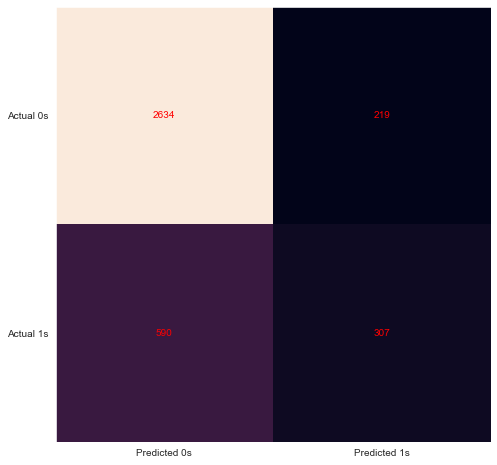

In [34]:
print("#################################################Accuracy####################################################")
print(accuracy_score(y_test, pred))
print()

print("################################################Classification Report###########################################")
print(classification_report(y_test, pred))
print()

print("#############################################Confustion Metrics###################################################")
plt.figure(figsize=(10, 10));

cm = confusion_matrix(y_test,pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Random forest classifier

In [35]:
rf = RandomForestClassifier()

In [36]:
rf.fit(X_train, y_train)

C:\Users\Anudeep\AppData\Local\Temp\ipykernel_23528\2725846524.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [37]:
pred = rf.predict(X_test)

----------------------------------------------------Accuracy------------------------------------------------------
0.988

---------------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2853
           1       0.99      0.96      0.97       897

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750


-------------------------------------------------Confustion Metrics----------------------------------------------------


<Figure size 720x720 with 0 Axes>

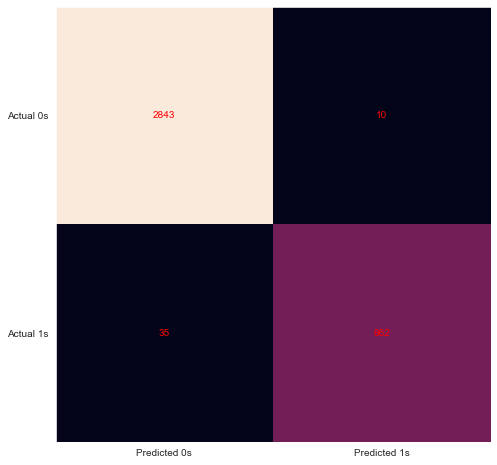

In [38]:
print("----------------------------------------------------Accuracy------------------------------------------------------")
print(accuracy_score(y_test, pred))
print()

print("---------------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))
print()

print("-------------------------------------------------Confustion Metrics----------------------------------------------------")
plt.figure(figsize=(10, 10));
cm = confusion_matrix(y_test,pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()